In [1]:
# Acoustic propagation in complex fluid 
# propagation in radial direction, cylinder symmetry
# and 
# plane wave propagation
# Excitation at circle arc or line at r1=L1
# Outside Boundary at circle arc at r2=L2, ABC Absorbing Boundary Condition
#
# Literature:
# [1] FEM GK 1 Lecture Slideds
# [2] Deutsche Gesellschaft fuer Akustik e.V., DEGA -Empfehlung 101, Akustische Wellen und Felder, März 2006  

%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# necessary parameters user inputs

# Fluid density
rho_real = 1.225     # kg / m³
rho_imag = -0.2      # kg / m³
# rho_imag = 0.0      # kg / m³

# Fluid Bulk modulus
K_bulk_real = 1.4261e+5
K_bulk_imag = 2e3

L1 = 0.25            # m 
L2 = 1               # m
L = L2 - L1

# excitation freqeuncy
frequency = 1000     # Hz 

n = 60                     

t=1

# Adjust pressure p1 and phi1 to match cfs simulation

phi0=0.0 - 0.55*np.pi

p1=1e6/254845.91310545322*1e6  # cfs simulation starts at L1=0.25m
# cfs pressure on L_excite boundary circl_cplx_ABC.xml



In [3]:
i = complex(0,1)
omega = 2*np.pi*frequency

rho = complex(rho_real, rho_imag )
K_bulk = complex(K_bulk_real, K_bulk_imag)

# Calc wave parameter

c = np.sqrt ( K_bulk / rho )


# wave number
k = (  omega / c )

# wlamba
wlamda = c / frequency

print("wave speed  c=", c)
print("wave number k=", k)
print("ww.len  lamda=", wlamda)




wave speed  c= (337.66885878293874+29.768112884652645j)
wave number k= (18.464037125230927-1.6277472060389564j)
ww.len  lamda= (0.33766885878293873+0.029768112884652646j)


In [4]:
# Plane wave propagation in x direction
def plane_wave_complex_fluid (r1, r2, k, c, f, t, phi0, p1, n):
   x = np.linspace ( r1, r2, n)
   tv = np.ones ( n ) * t
    
   w_c = p1 * np.exp ( i * ( omega * tv - k * x) ) * np.exp ( i * phi0 )

   return w_c, x    

In [5]:
# cylindrical wave propagation in radial x direction
def radial_cyl_wave_complex_fluid (r1, r2, k, c, f, t, phi0, p1, n):
   x = np.linspace ( r1, r2, n)
   tv = np.ones ( n ) * t

   inv_fact = np.pi * k * x
   fact = 2 / inv_fact  
    
   w_c = p1 * np.sqrt ( fact ) * np.exp ( i * ( omega * tv - k * x) ) * np.exp ( i * phi0 )

   return w_c, x    

In [6]:
w_plane, x = plane_wave_complex_fluid (L1, L2, k, c, frequency, t, phi0, p1, n)

In [7]:
w_radial, x = radial_cyl_wave_complex_fluid (L1, L2, k, c, frequency, t, phi0, p1,n)

In [8]:
print("|p(L1)|=",np.abs(w_plane[0]))
print("|p(L2)|=",np.abs(w_plane[n-1]))
print()
atten_plane = ((np.abs(w_plane[n-1]) / np.abs(w_plane[0])))
print("Attenuation sim. =",atten_plane)
print("Attenuation anal.=",np.exp(np.imag(k)*L))

|p(L1)|= 2612112.7516896036
|p(L2)|= 770549.773579404

Attenuation sim. = 0.29499100798041206
Attenuation anal.= 0.294991007980412


In [9]:
# compare analytic, discrete simulated and cfs simulated amplitude attenuation

print("|p(L1)|=",np.abs(w_radial[0]))
print("|p(L2)|=",np.abs(w_radial[n-1]))
print()

# analytic attenuation due to geometry
atten_geom = np.abs(np.sqrt(2/(k*np.pi*L2)) / np.sqrt(2/(k*np.pi*L1)))
print("Attenuation geom.   =", atten_geom )

atten_radial = ((np.abs(w_radial[n-1]) / np.abs(w_radial[0])))
print("Attenuation sim.    =",atten_radial)

# analytic attenuation due to damping in complex fluid
atten_complex_fluid = np.exp(np.imag(k)*L)
print("Attenuation analytic=", atten_geom * atten_complex_fluid)

#### results hardcoded, taken from simulation result ####
# see plot over line circl_cplx_ABS.cfs, *.hd5 and results in *.pvsm
cfs_ampl_L1 = 1e6
cfs_ampl_L2 = 0.148397e6
                             
atten_cfs_sim = cfs_ampl_L2 / cfs_ampl_L1                              
print("Attenuation cfs sim.=", atten_cfs_sim )                             

|p(L1)|= 968184.433363244
|p(L2)|= 142802.85095438373

Attenuation geom.   = 0.5
Attenuation sim.    = 0.14749550399020603
Attenuation analytic= 0.147495503990206
Attenuation cfs sim.= 0.148397


<IPython.core.display.Javascript object>


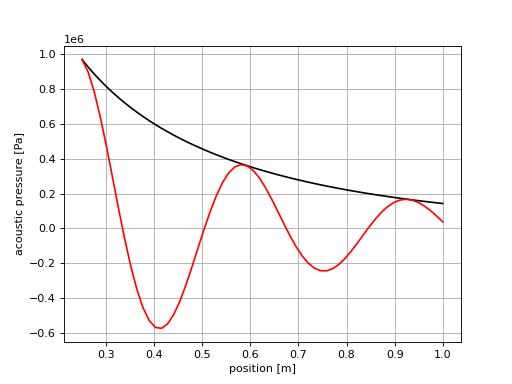

Text(0, 0.5, 'acoustic pressure [Pa]')

In [10]:
# static plot cylindrical wave

fig2,ax2 = plt.subplots()

ax2.plot(x,np.abs(w_radial),'black')
ax2.plot(x,np.real(w_radial),'red')
# ax2.plot(x,np.imag(w_radial))
# ax2.plot(x,-np.real(w_radial))
# ax2.plot(x,-np.imag(w_radial))
# ax2.plot(x,-np.abs(w_radial))

ax2.grid()
ax2.set_xlabel("position [m]")
ax2.set_ylabel("acoustic pressure [Pa]")
# ax2.title("Radial cylindrical wave propagation towards ABC")


<IPython.core.display.Javascript object>


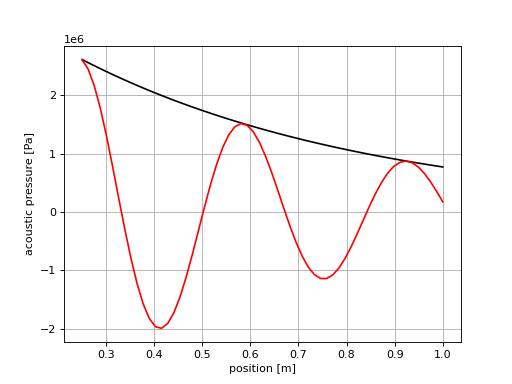

Text(0, 0.5, 'acoustic pressure [Pa]')

In [11]:
# static plot plane wave
fig1,ax1 = plt.subplots()

ax1.plot(x,np.abs(w_plane),'black')
ax1.plot(x,np.real(w_plane),'red')
# ax1.plot(x,np.imag(w_plane))
# ax1.plot(x,-np.real(w_plane))
# ax1.plot(x,-np.imag(w_plane))
# ax1.plot(x,-np.abs(w_plane))


ax1.grid()
ax1.set_xlabel("position [m]")
ax1.set_ylabel("acoustic pressure [Pa]")
# ax1.title("Plane wave propagation towards ABC")




<IPython.core.display.Javascript object>


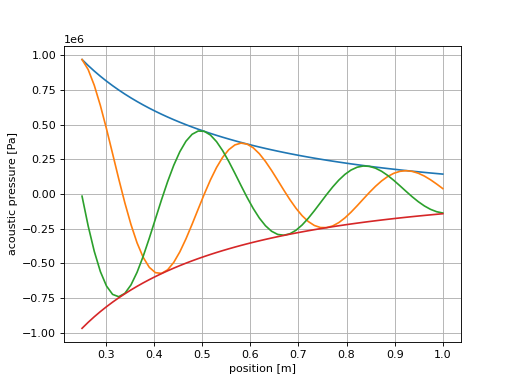

Text(0, 0.5, 'acoustic pressure [Pa]')

In [12]:
# static plot cylindrical wave

fig2,ax2 = plt.subplots()

ax2.plot(x,np.abs(w_radial))
ax2.plot(x,np.real(w_radial))
ax2.plot(x,np.imag(w_radial))
# ax2.plot(x,-np.real(w_radial))
# ax2.plot(x,-np.imag(w_radial))
ax2.plot(x,-np.abs(w_radial))

ax2.grid()
ax2.set_xlabel("position [m]")
ax2.set_ylabel("acoustic pressure [Pa]")
# ax2.title("Radial cylindrical wave propagation towards ABC")


In [13]:
w_plane, x = plane_wave_complex_fluid (L1, L2, k, c, frequency, t, phi0, p1, n)

In [14]:
# calculate anal<tic attenuation due to complex fluid for plane wave
print("|p(L1)|=",np.abs(w_plane[0]))
print("|p(L2)|=",np.abs(w_plane[n-1]))
print()
atten_plane = ((np.abs(w_plane[n-1]) / np.abs(w_plane[0])))
print("Attenuation sim. =",atten_plane)
print("Attenuation anal.=",np.exp(np.imag(k)*L))

|p(L1)|= 2612112.7516896036
|p(L2)|= 770549.773579404

Attenuation sim. = 0.29499100798041206
Attenuation anal.= 0.294991007980412


<IPython.core.display.Javascript object>


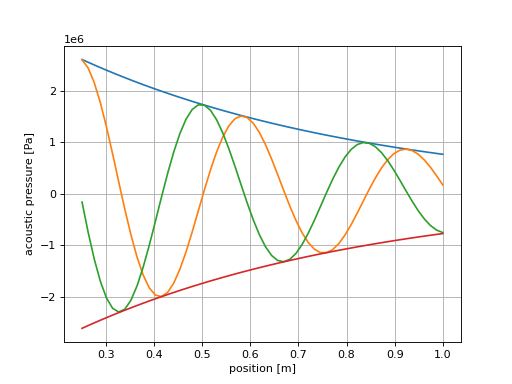

Text(0, 0.5, 'acoustic pressure [Pa]')

In [15]:
# static plot plane wave
fig1,ax1 = plt.subplots()

ax1.plot(x,np.abs(w_plane))
ax1.plot(x,np.real(w_plane))
ax1.plot(x,np.imag(w_plane))
# ax1.plot(x,-np.real(w_plane))
# ax1.plot(x,-np.imag(w_plane))
ax1.plot(x,-np.abs(w_plane))


ax1.grid()
ax1.set_xlabel("position [m]")
ax1.set_ylabel("acoustic pressure [Pa]")
# ax1.title("Plane wave propagation towards ABC")


